In [516]:
#Make it python 2.x and 3.x compatible
from __future__ import division, print_function

#Import modules
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.dates as md
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas.tools.rplot as rplot

import glob as gb
import os
import sys

import re

import datetime as dt
%matplotlib inline

from IPython.display import HTML


from dateutil.parser import parse

sns.set(style="white", context="talk")

In [517]:
xlxs=pd.ExcelFile("Total electricity consumption.xlsx",skiprows=6)
xlxs.parse?
test1 = xlxs.parse('Sheet1', skiprows=6,na_values='n/a')
test1.head()

,Number,Locations,Active,Id,Lenovo Global Region,Primary Function,Subsidiaries,T&D Loss Rate Category,Type,Ref,...,Oct to Dec 2014.4,Jan to Mar 2015.4,Apr to Jun 2015.4,Jul to Sep 2015.4,Oct to Dec 2015.4,Jan to Mar 2016.4,Apr to Jun 2016.4,Jul to Sep 2016.4,Oct to Dec 2016.4,Jan to Mar 2017.4
0,NaN,Argentina,yes,24619713.0,NaN,NaN,NaN,NaN,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Australia - Melbourne,no,29032073.0,Asia Pacific,Small Office (OSL),Lenovo,NaN,Property,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Australia - Melbourne MM,yes,31105429.0,Asia Pacific,Small Office (OSL),Motorola Mobility,NaN,Property,ZAS66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Australia,yes,24619618.0,NaN,NaN,NaN,NaN,Normal,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Australia - St Leonards,no,29032075.0,Asia Pacific,Small Office (OSL),Medion,NaN,Property,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [518]:
list(test1.columns.values)

['Number',
 'Locations',
 'Active',
 'Id',
 'Lenovo Global Region',
 'Primary Function',
 'Subsidiaries',
 'T&D Loss Rate Category',
 'Type',
 'Ref',
 'Acquisition date',
 'Disposal date',
 'Corporate Admin Approver',
 'Data Providers',
 'Initiative administrator',
 'Initiative approver',
 'Initiative user',
 'Invoice owner',
 'Manager Approver',
 'Measure reader',
 'Reviewers ',
 'Site Auditor',
 'Site Data Coordinator (Site manager)',
 'Site Data Coordinators_test',
 'Site Data Reviewer (Data Approver)',
 'Site Data Reviewer_test',
 'Suppliers',
 'eGrid',
 'Country',
 'Reference',
 'Location',
 'Source type',
 'Meter note',
 'CRC meter',
 'Meter indicator',
 'Meter default unit',
 'Meter cost indicator',
 'Meter cost unit',
 'Meter days indicator',
 'Supplier',
 'Contract ref.',
 'Apr to Jun 2012',
 'Jul to Sep 2012',
 'Oct to Dec 2012',
 'Jan to Mar 2013',
 'Apr to Jun 2013',
 'Jul to Sep 2013',
 'Oct to Dec 2013',
 'Jan to Mar 2014',
 'Apr to Jun 2014',
 'Jul to Sep 2014',
 'Oct to

In [519]:
plot_cols = ['Locations','Number','Lenovo Global Region','Primary Function',
 'Subsidiaries',
 'Apr 2015 to Mar 2016 [kWh]',
'Apr 2015 to Mar 2016 [MT]','Apr 2015 to Mar 2016 [kWh/ft2]','Jan to Mar 2016 [# of people]','[USD/kWh]','Apr 2015 to Mar 2016 [USD]','Apr 2015 to Mar 2016 [USD/# of employee]']

In [520]:
test2=test1.ix[:,plot_cols]

In [521]:
test2

,Locations,Number,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],Apr 2015 to Mar 2016 [kWh/ft2],Jan to Mar 2016 [# of people],[USD/kWh],Apr 2015 to Mar 2016 [USD],Apr 2015 to Mar 2016 [USD/# of employee]
0,Argentina,NaN,NaN,NaN,NaN,8.327015e+05,330.332750,16.583188,378.0,0.039664,3.302822e+04,87.376252
1,Australia - Melbourne,NaN,Asia Pacific,Small Office (OSL),Lenovo,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
2,Australia - Melbourne MM,NaN,Asia Pacific,Small Office (OSL),Motorola Mobility,NaN,7.935771,NaN,6.0,NaN,NaN,0.000000
3,Australia,3.0,NaN,NaN,NaN,3.001254e+05,247.435864,15.663439,192.0,0.111872,3.357550e+04,201.368804
4,Australia - St Leonards,NaN,Asia Pacific,Small Office (OSL),Medion,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
5,Belgium - Diegem/Brussels,NaN,EMEA,Small Office (OSL),Lenovo,NaN,30.135230,22.582069,32.0,NaN,NaN,0.000000
6,Brazil - Campinas,NaN,Americas Group,Research and Development (RD),Lenovo,5.414416e+04,7.255318,5.147315,23.0,NaN,NaN,0.000000
7,Brazil - Campinas (historic),NaN,Americas Group,Large Office (OFL),Lenovo,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000
8,Austria,8.0,NaN,NaN,NaN,6.684700e+04,11.096602,8.356157,46.0,0.115180,7.699412e+03,167.378529
9,Canada - Kitchener,NaN,Americas Group,Small Office (OSL),Motorola Mobility,NaN,0.312385,NaN,0.0,NaN,NaN,0.000000


In [522]:
test3=test2.dropna(axis=0)
#simplest way to plot.
#test3.plot(kind='scatter', x='Apr 2015 to Mar 2016 [kWh]', y='Apr 2015 to Mar 2016 [MT]')

In [523]:
#Round the decimals of kWh and MT to 1 decimal. 
decimals = pd.Series([0,0,1, 1,0,0], index=['Number','Jan to Mar 2016 [# of people]','Apr 2015 to Mar 2016 [kWh]', 'Apr 2015 to Mar 2016 [MT]', 'Apr 2015 to Mar 2016 [USD]','Apr 2015 to Mar 2016 [USD/# of employee]'])
test4 = test3.round(decimals)
test4.head()

,Locations,Number,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],Apr 2015 to Mar 2016 [kWh/ft2],Jan to Mar 2016 [# of people],[USD/kWh],Apr 2015 to Mar 2016 [USD],Apr 2015 to Mar 2016 [USD/# of employee]
154,Brazil - Jaguariuna MM,1.0,Americas Group,Large Office (OFL),Motorola Mobility,9801463.4,1748.1,39.697734,177.0,0.146410,1435032.0,7969.0
156,"United States - Morrisville, NC - Development ...",2.0,Americas Group,Research and Development (RD),Lenovo,19410730.8,8468.3,40.765697,1137.0,0.065593,1273208.0,1173.0
158,Brazil - Itu,3.0,Americas Group,Manufacturing (MFG),Lenovo,4994568.0,696.9,8.256423,554.0,0.195273,975305.0,1466.0
159,"United States - Morrisville, NC - Think Place",4.0,Americas Group,Research and Development (RD),Lenovo,10992200.9,4721.7,24.537747,1667.0,0.088705,975058.0,515.0
160,Japan - NEC Yonezawa,5.0,Asia Pacific,Manufacturing (MFG),NEC,4085360.0,2511.5,14.070688,1100.0,0.179515,733382.0,667.0


In [524]:
test4['Number'] = test4['Number'].astype(int)

# Find the top 10 sites with highest MT/kWh.

In [525]:
#Find those problematic sites by sorting MT/kWh
test4['MT/kWh']=test4['Apr 2015 to Mar 2016 [MT]']/test4['Apr 2015 to Mar 2016 [kWh]'].round(4)
result2 = test4.sort('MT/kWh', ascending=False)
result2.head(10)

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Locations,Number,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],Apr 2015 to Mar 2016 [kWh/ft2],Jan to Mar 2016 [# of people],[USD/kWh],Apr 2015 to Mar 2016 [USD],Apr 2015 to Mar 2016 [USD/# of employee],MT/kWh
188,India - Chennai Factory,22,Asia Pacific,Manufacturing (MFG),Motorola Mobility,316360.0,271.9,1.236376,2.0,0.378035,119595.0,59798.0,0.000859
189,India - Pondicherry,23,Asia Pacific,Manufacturing (MFG),Lenovo,1074016.0,907.9,12.014383,395.0,0.103127,110760.0,284.0,0.000845
186,India - Bangalore Ferns,21,Asia Pacific,Research and Development (RD),Lenovo,1016173.0,805.7,24.716009,450.0,0.133663,135824.0,298.0,0.000793
173,India - Bangalore,13,Asia Pacific,Large Office (OFL),Motorola Mobility,2327140.7,1840.8,23.895583,230.0,0.134740,313559.0,1115.0,0.000791
161,"United States - Chicago MMart, IL",6,Americas Group,Research and Development (RD),Motorola Mobility,13411754.1,9033.0,22.095166,1600.0,0.053579,718595.0,449.0,0.000674
167,Germany - Medion,10,EMEA,Research and Development (RD),Medion,2408323.0,1574.1,8.373531,776.0,0.223240,537635.0,688.0,0.000654
178,"United States - Chicago GNPO - CPC, IL",16,Americas Group,Research and Development (RD),Motorola Mobility,2881762.4,1869.8,45.742317,100.0,0.083165,239663.0,2123.0,0.000649
160,Japan - NEC Yonezawa,5,Asia Pacific,Manufacturing (MFG),NEC,4085360.0,2511.5,14.070688,1100.0,0.179515,733382.0,667.0,0.000615
169,Taiwan - Taipei Design Centre x86,11,Asia Pacific,Research and Development (RD),x86,2782972.0,1703.2,45.543395,486.0,0.132741,369413.0,856.0,0.000612
164,Japan - NEC Gunma,8,Asia Pacific,Manufacturing (MFG),NEC,2987555.8,1828.3,8.195148,450.0,0.198727,593708.0,1319.0,0.000612


# Only focus on the sites with total costs more than 150,000K, removed all the other sites(by a quick way), stored the complete sites in dataframe "complate_sites".

In [526]:
complete_sites = test4
test4 = test4[test4['Apr 2015 to Mar 2016 [USD]']>100000]

In [527]:
EMEA=test4[test4['Lenovo Global Region'] =='EMEA']
Americas_Group=test4[test4['Lenovo Global Region'] =='Americas Group']
Asia_Pacific=test4[test4['Lenovo Global Region'] =='Asia Pacific']

# Summary by global regions.

In [528]:
#Summary by global region
result3= result2.groupby(['Lenovo Global Region']).sum()
result3

,Number,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],Apr 2015 to Mar 2016 [kWh/ft2],Jan to Mar 2016 [# of people],[USD/kWh],Apr 2015 to Mar 2016 [USD],Apr 2015 to Mar 2016 [USD/# of employee],MT/kWh
Lenovo Global Region,,,,,,,,,
Americas Group,85,75673568.4,32801.0,282.025684,7321.0,1.078760,7195491.0,20528.0,0.004190
Asia Pacific,129,17587700.5,11614.3,164.551038,4708.0,1.710624,3041939.0,65213.0,0.006295
EMEA,62,6401898.5,3300.9,181.875311,1277.0,0.845659,1197076.0,4749.0,0.002047


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5D98E6898>], dtype=object)

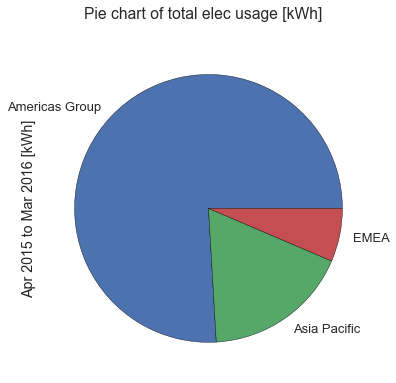

In [529]:
result3['Apr 2015 to Mar 2016 [kWh]'].plot.pie(subplots=True, figsize=(6,6),title="Pie chart of total elec usage [kWh]")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5D75DE978>], dtype=object)

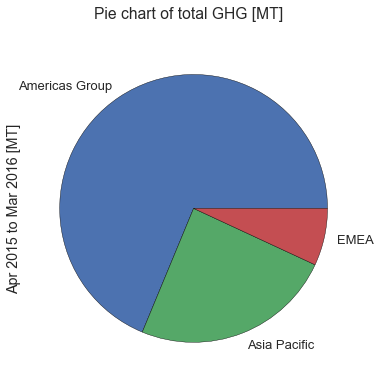

In [530]:
result3['Apr 2015 to Mar 2016 [MT]'].plot.pie(subplots=True, figsize=(6,6),title="Pie chart of total GHG [MT]")

In [531]:
################???????????????
#Mark the location of the most problematic point on the graph. 
#test4['MT/kWh'].idxmax(axis=0)
location=(test4.ix[test4['MT/kWh'].idxmax(axis=0),'Apr 2015 to Mar 2016 [kWh]'],test4.ix[test4['MT/kWh'].idxmax(axis=0),'Apr 2015 to Mar 2016 [MT]'])
#location

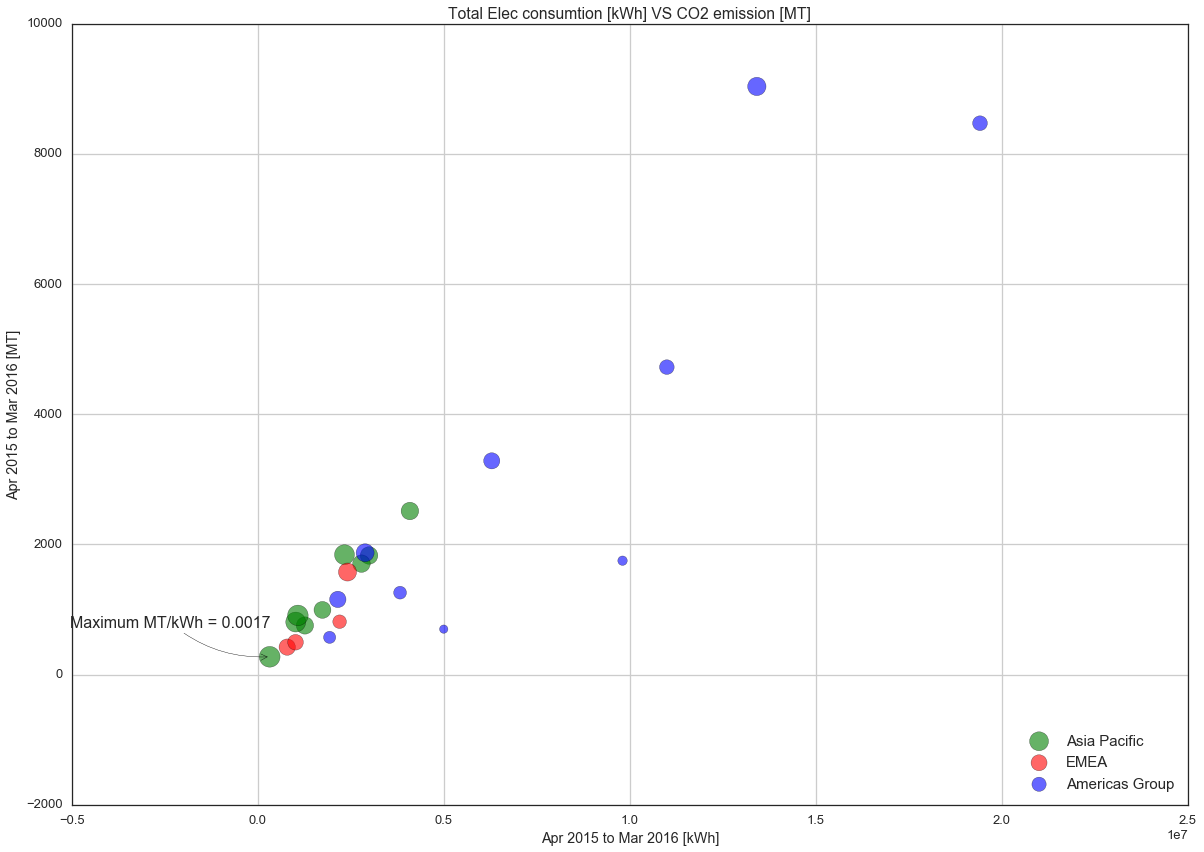

In [532]:
#RED=EMEA,  Green= Asia Pacific, Blue= Americas Group.
fig1 = plt.figure(figsize=(20,14), dpi=300)
ax = plt.subplot(111)

plot_AP = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'],Asia_Pacific['Apr 2015 to Mar 2016 [MT]'],alpha=0.6,c='g',s=500000*Asia_Pacific['Apr 2015 to Mar 2016 [MT]']/Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'])
plot_EMEA= plt.scatter(EMEA['Apr 2015 to Mar 2016 [kWh]'],EMEA['Apr 2015 to Mar 2016 [MT]'],alpha=0.6,c='r',s=500000*EMEA['Apr 2015 to Mar 2016 [MT]']/EMEA['Apr 2015 to Mar 2016 [kWh]'])
plot_Americas = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [kWh]'],Americas_Group['Apr 2015 to Mar 2016 [MT]'],alpha=0.6,c='b',s=500000*Americas_Group['Apr 2015 to Mar 2016 [MT]']/Americas_Group['Apr 2015 to Mar 2016 [kWh]'])


#plot = rplot.RPlot(test4, x='Apr 2015 to Mar 2016 [kWh]', y='Apr 2015 to Mar 2016 [MT]')

ax.grid(True)
#ax.set_xlim([0,xmax])
#ax.set_ylim([0,ymax])
ax.set_xlabel('Apr 2015 to Mar 2016 [kWh]')

#ax.xaxis.set_label_coords(1,0.45)
ax.set_ylabel('Apr 2015 to Mar 2016 [MT]')

#ax.yaxis.set_label_coords(0.4,1)
ax.set_title('Total Elec consumtion [kWh] VS CO2 emission [MT]')

#x1 = np.arange(0,xmax+10,1)
#y1 = np.max(y/x)*x1
#y2 = np.average(y/x)*x1 


#mark the maximum MT/kWh point
plt.annotate('Maximum MT/kWh = 0.0017',
             xy=location,  xycoords='data',
             xytext=(-200, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



plt.legend((plot_AP, plot_EMEA, plot_Americas),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=4,
           fontsize=15)

#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
fig1.savefig('Total Elec consumtion [kWh] VS CO2 emission [MT].png')

In [533]:
Asia_Pacific['MT/kWh'].mean()

0.00069946900252560709

In [534]:
len(Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'])

9

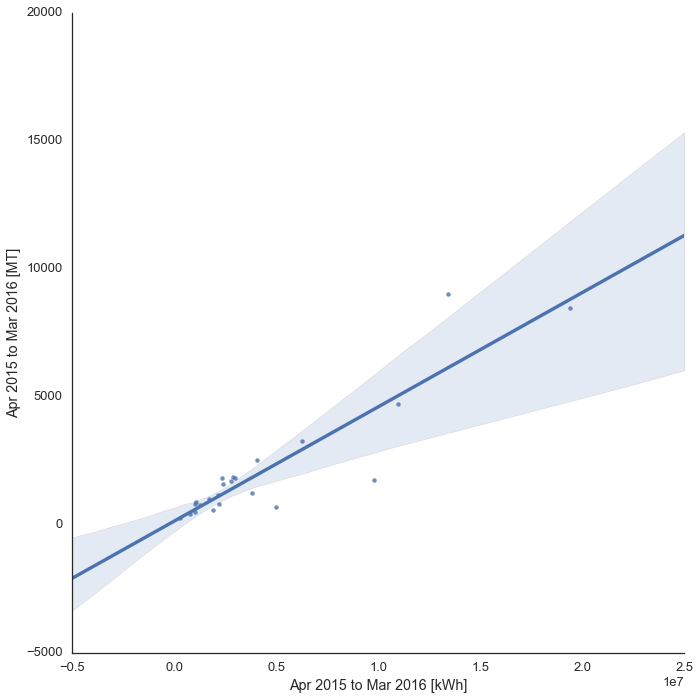

In [535]:
sns.lmplot(x="Apr 2015 to Mar 2016 [kWh]", y="Apr 2015 to Mar 2016 [MT]", data=test4,size=10, aspect=1)

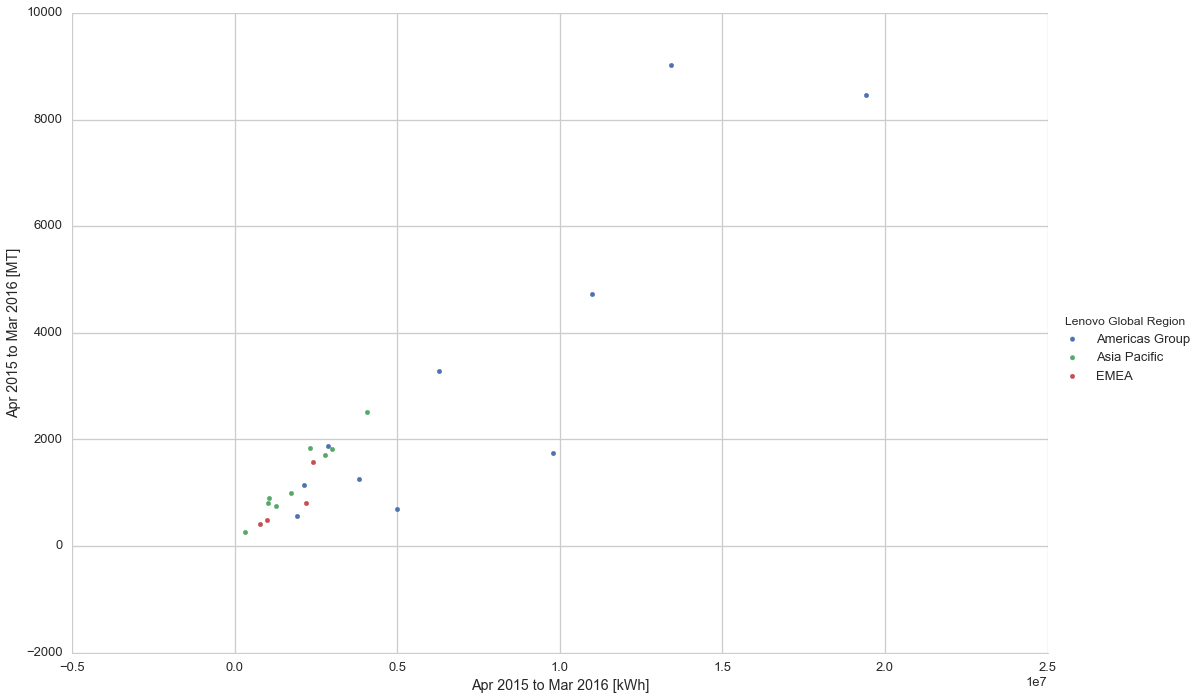

In [536]:
#use seaborn to plot. 
sns.set_style("whitegrid")
g = sns.FacetGrid(test4, hue="Lenovo Global Region",size=10, aspect=1.5)
g=(g.map(plt.scatter, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]").add_legend())

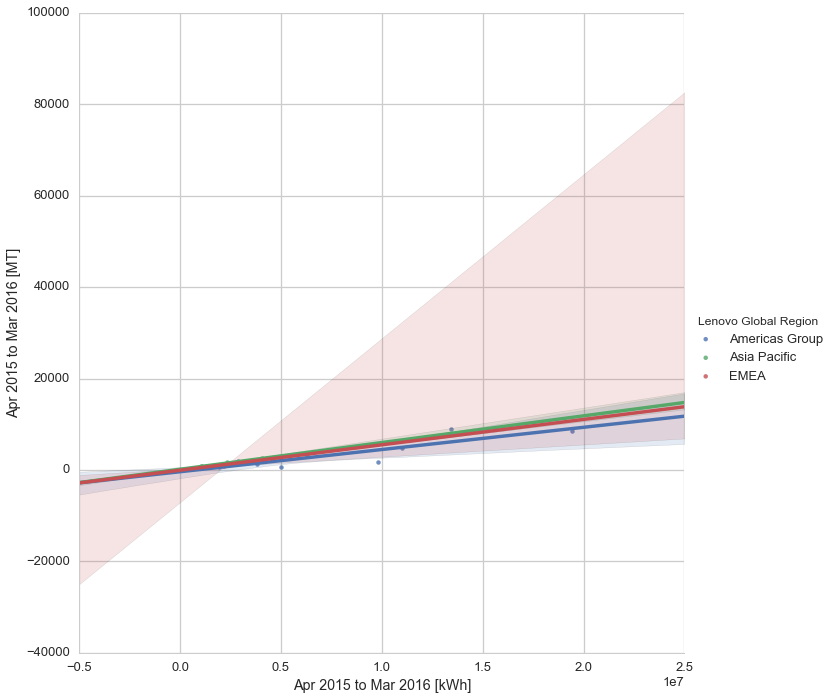

In [537]:
#g = sns.FacetGrid(test4, margin_titles=True,hue="Lenovo Global Region",size=10, aspect=1)
#g.map(sns.regplot, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]", order=1)

sns.lmplot(x="Apr 2015 to Mar 2016 [kWh]", y="Apr 2015 to Mar 2016 [MT]", data=test4, hue="Lenovo Global Region",size=10, aspect=1)

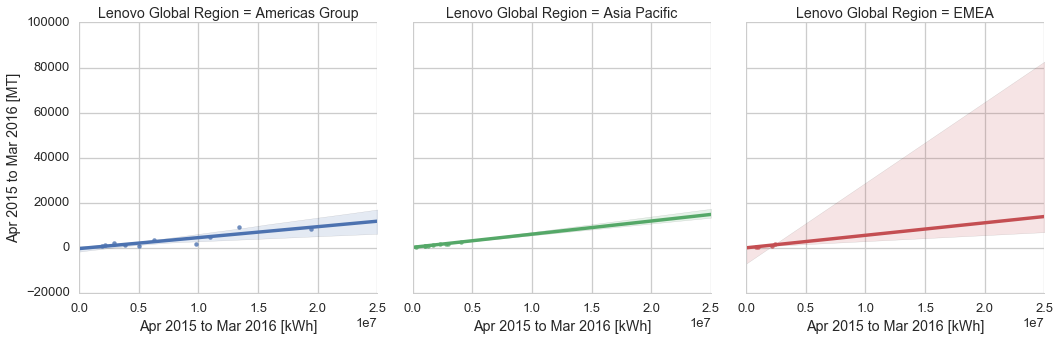

In [538]:
#Plot by global region.
sns.set_style("whitegrid")
g = sns.FacetGrid(test4, col="Lenovo Global Region", hue="Lenovo Global Region",margin_titles=True,size=5, aspect=1)
g.map(sns.regplot, "Apr 2015 to Mar 2016 [kWh]", "Apr 2015 to Mar 2016 [MT]", order=1)


# Part 2, scatter plot of energy price VS. USD/#employee

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5DBE705C0>], dtype=object)

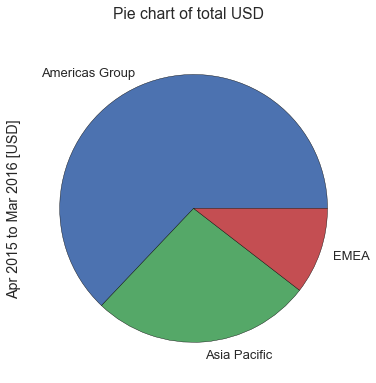

In [539]:
result3['Apr 2015 to Mar 2016 [USD]'].plot.pie(subplots=True, figsize=(6,6),title="Pie chart of total USD")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5E1A1F5C0>], dtype=object)

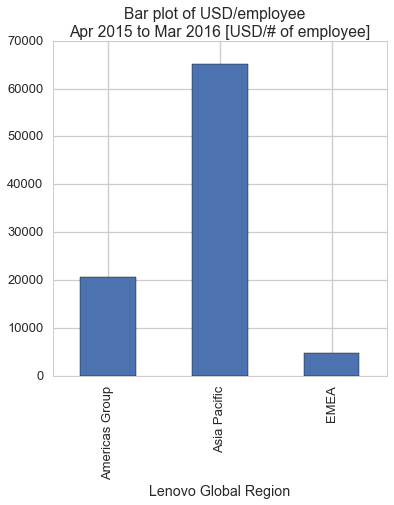

In [540]:
result3['Apr 2015 to Mar 2016 [USD/# of employee]'].plot.bar(subplots=True, figsize=(6,6),title="Bar plot of USD/employee")

In [541]:
test4.sort(['Apr 2015 to Mar 2016 [USD/# of employee]'],ascending=False).head()

C:\Users\ycao_000\Anaconda2\envs\Python3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Locations,Number,Lenovo Global Region,Primary Function,Subsidiaries,Apr 2015 to Mar 2016 [kWh],Apr 2015 to Mar 2016 [MT],Apr 2015 to Mar 2016 [kWh/ft2],Jan to Mar 2016 [# of people],[USD/kWh],Apr 2015 to Mar 2016 [USD],Apr 2015 to Mar 2016 [USD/# of employee],MT/kWh
188,India - Chennai Factory,22,Asia Pacific,Manufacturing (MFG),Motorola Mobility,316360.0,271.9,1.236376,2.0,0.378035,119595.0,59798.0,0.000859
154,Brazil - Jaguariuna MM,1,Americas Group,Large Office (OFL),Motorola Mobility,9801463.4,1748.1,39.697734,177.0,0.146410,1435032.0,7969.0,0.000178
180,"United States - Santa Clara, CA",17,Americas Group,Research and Development (RD),x86,1927365.3,570.6,53.873189,66.0,0.119019,229392.0,3403.0,0.000296
162,"United States - Sunnyvale, CA",7,Americas Group,Research and Development (RD),Motorola Mobility,3821050.0,1257.0,16.101935,170.0,0.161233,616077.0,2347.0,0.000329
178,"United States - Chicago GNPO - CPC, IL",16,Americas Group,Research and Development (RD),Motorola Mobility,2881762.4,1869.8,45.742317,100.0,0.083165,239663.0,2123.0,0.000649


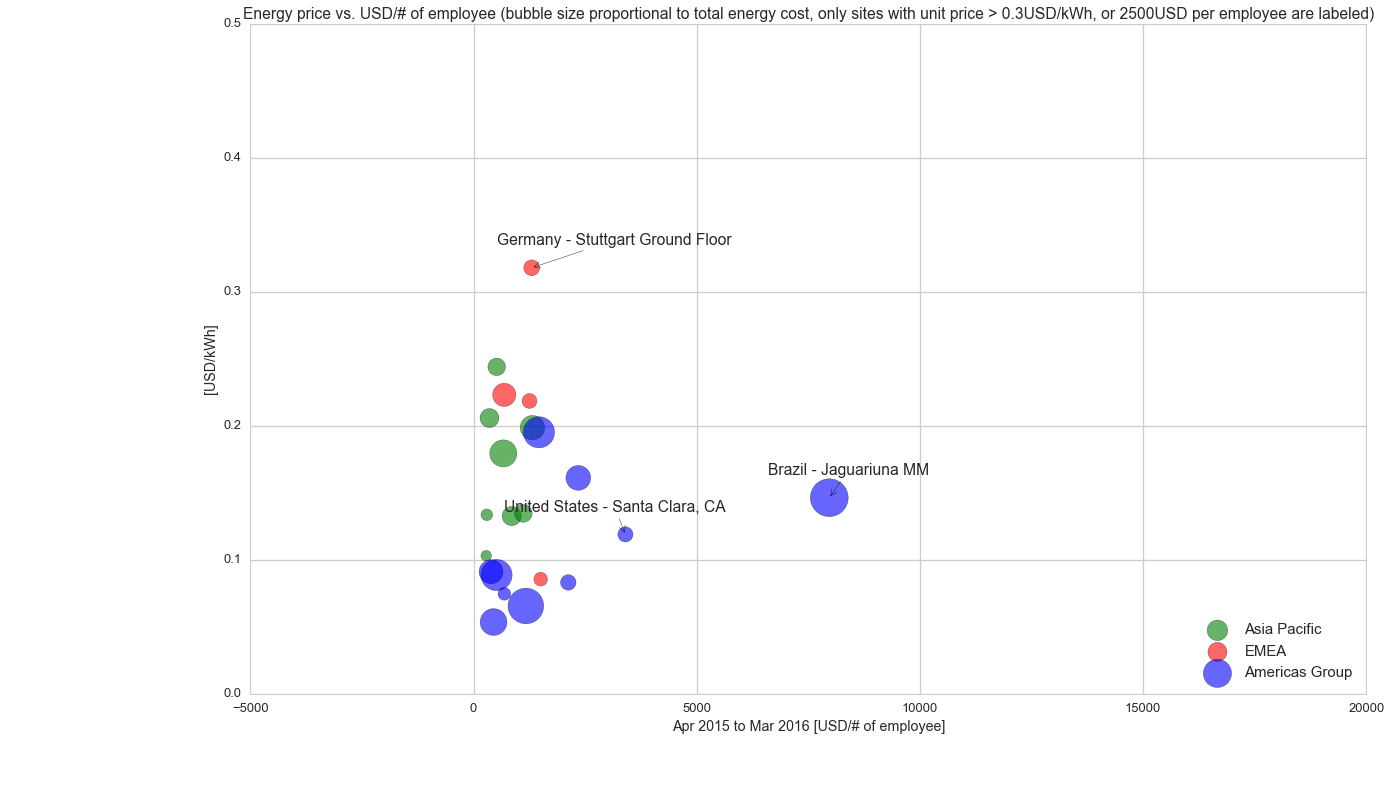

In [542]:
#All sites with total cost >150000 included (#Exclude Chennai factory. )
fig2 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax2 = plt.subplot(111)

plot_AP2 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [USD/# of employee]'],Asia_Pacific['[USD/kWh]'],alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [USD]']/1000)
plot_EMEA2 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [USD/# of employee]'],EMEA['[USD/kWh]'],alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [USD]']/1000)
plot_AG2 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [USD/# of employee]'],Americas_Group['[USD/kWh]'],alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [USD]']/1000)

xmax2=2500
ymax2=0.3
ax2.grid(True)
#Exclude Chennai factory. 
ax2.set_xlim([-5000,20000])
ax2.set_ylim([0,0.5])
ax2.set_xlabel('Apr 2015 to Mar 2016 [USD/# of employee]')
ax2.set_ylabel('[USD/kWh]')
ax2.set_title('Energy price vs. USD/# of employee (bubble size proportional to total energy cost, only sites with unit price > 0.3USD/kWh, or 2500USD per employee are labeled)')


labels1 = Asia_Pacific['Locations']
labels2 = EMEA['Locations']
labels3 = Americas_Group['Locations']


#add data label to the plot where elec price> 0.3 USD/kWh or total cost >100K.
for label, x, y in zip(labels1, Asia_Pacific['Apr 2015 to Mar 2016 [USD/# of employee]'], Asia_Pacific['[USD/kWh]']):
    if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (100, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels2, EMEA['Apr 2015 to Mar 2016 [USD/# of employee]'], EMEA['[USD/kWh]']):
    if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (200,20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels3, Americas_Group['Apr 2015 to Mar 2016 [USD/# of employee]'], Americas_Group['[USD/kWh]']):
    if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (100, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )
        
        
        

#Add legend. 
plt.legend((plot_AP2, plot_EMEA2, plot_AG2),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=4,
           fontsize=15)

fig2.savefig('Energypricevs.USD#ofemployee.png')

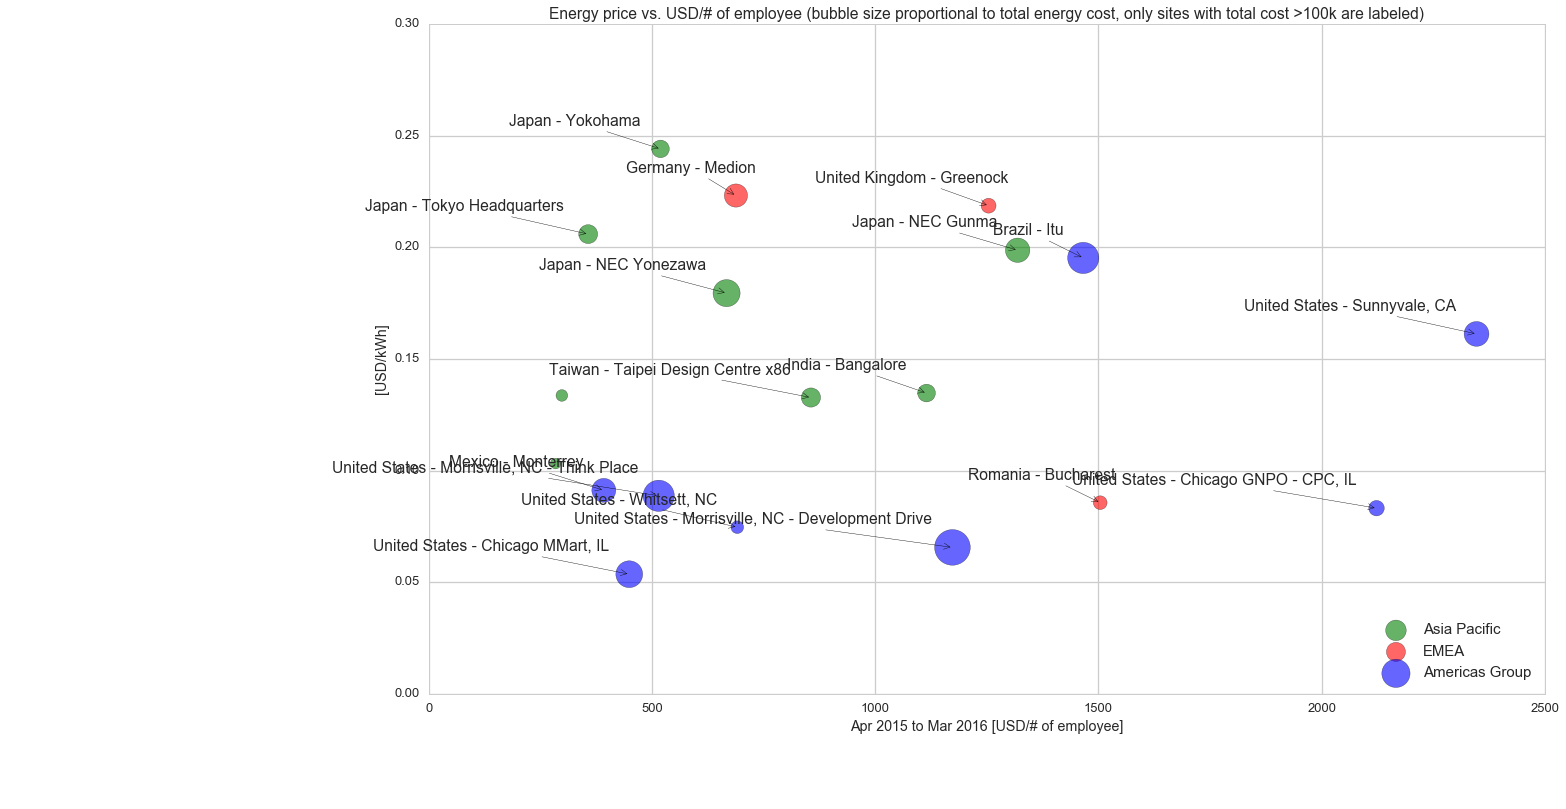

In [543]:
#No outliers
fig2 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax2 = plt.subplot(111)

plot_AP2 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [USD/# of employee]'],Asia_Pacific['[USD/kWh]'],alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [USD]']/1000)
plot_EMEA2 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [USD/# of employee]'],EMEA['[USD/kWh]'],alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [USD]']/1000)
plot_AG2 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [USD/# of employee]'],Americas_Group['[USD/kWh]'],alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [USD]']/1000)

#zoom in range.
xmax2=2500
ymax2=0.3
ax2.grid(True)
ax2.set_xlim([0,xmax2])
ax2.set_ylim([0,ymax2])
ax2.set_xlabel('Apr 2015 to Mar 2016 [USD/# of employee]')
ax2.set_ylabel('[USD/kWh]')
ax2.set_title('Energy price vs. USD/# of employee (bubble size proportional to total energy cost, only sites with total cost >100k are labeled)')


labels1 = Asia_Pacific['Locations']
labels2 = EMEA['Locations']
labels3 = Americas_Group['Locations']




#add data label to plot.
for label, x, y, total_cost in zip(labels1, Asia_Pacific['Apr 2015 to Mar 2016 [USD/# of employee]'], Asia_Pacific['[USD/kWh]'],Asia_Pacific['Apr 2015 to Mar 2016 [USD]']):
    if total_cost>150000:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y, total_cost in zip(labels2, EMEA['Apr 2015 to Mar 2016 [USD/# of employee]'], EMEA['[USD/kWh]'],EMEA['Apr 2015 to Mar 2016 [USD]']):
    if total_cost>150000:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (20,20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y, total_cost in zip(labels3, Americas_Group['Apr 2015 to Mar 2016 [USD/# of employee]'], Americas_Group['[USD/kWh]'],Americas_Group['Apr 2015 to Mar 2016 [USD]']):
    if total_cost>150000:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )
        
        
        

#Add legend. 
plt.legend((plot_AP2, plot_EMEA2, plot_AG2),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=4,
           fontsize=15)

fig2.savefig('Energypricevs.USD#ofemployee2.png')


In [544]:
#second way of plotting (with legend but no area change)

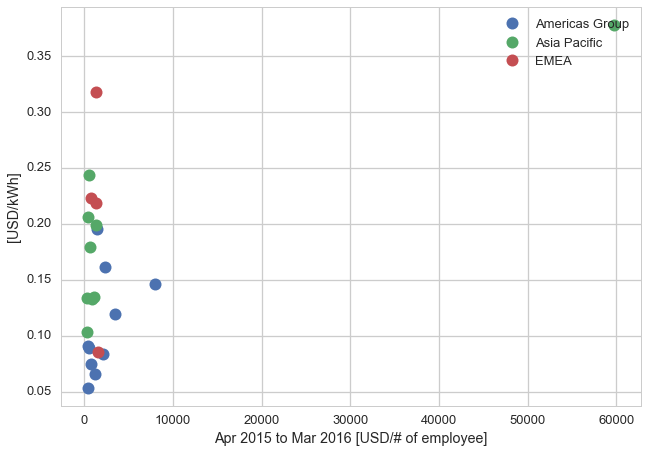

In [545]:
groups = test4.groupby('Lenovo Global Region')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Apr 2015 to Mar 2016 [USD/# of employee]'], group['[USD/kWh]'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_xlabel("Apr 2015 to Mar 2016 [USD/# of employee]")
ax.set_ylabel("[USD/kWh]")
plt.show()

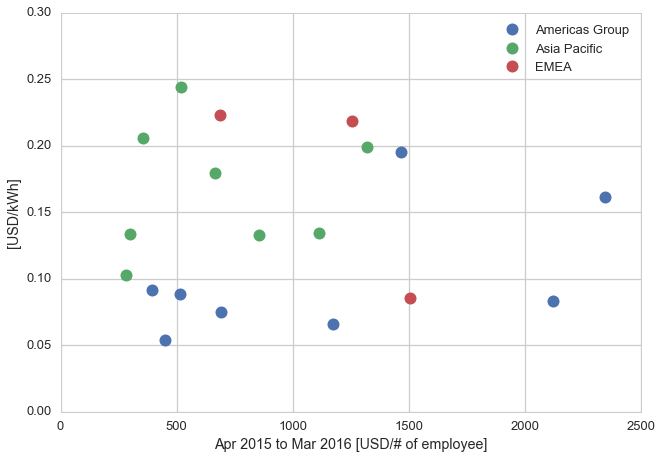

In [546]:
groups = test4.groupby('Lenovo Global Region')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Apr 2015 to Mar 2016 [USD/# of employee]'], group['[USD/kWh]'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_xlim([0,2500])
ax.set_ylim([0,0.3])
ax.set_xlabel("Apr 2015 to Mar 2016 [USD/# of employee]")
ax.set_ylabel("[USD/kWh]")

plt.show()
fig.savefig('OPEX VS. CAPEX1.png')

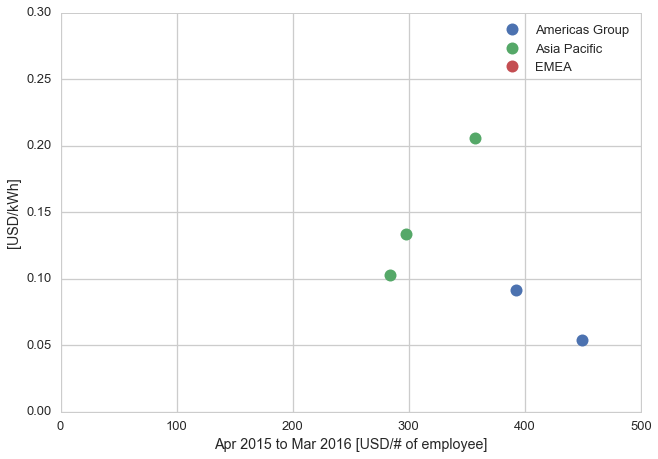

In [547]:
groups = test4.groupby('Lenovo Global Region')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['Apr 2015 to Mar 2016 [USD/# of employee]'], group['[USD/kWh]'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
ax.set_xlim([0,500])
ax.set_ylim([0,0.3])
ax.set_xlabel("Apr 2015 to Mar 2016 [USD/# of employee]")
ax.set_ylabel("[USD/kWh]")
plt.show()
fig.savefig('OPEX VS. CAPEX2.png')

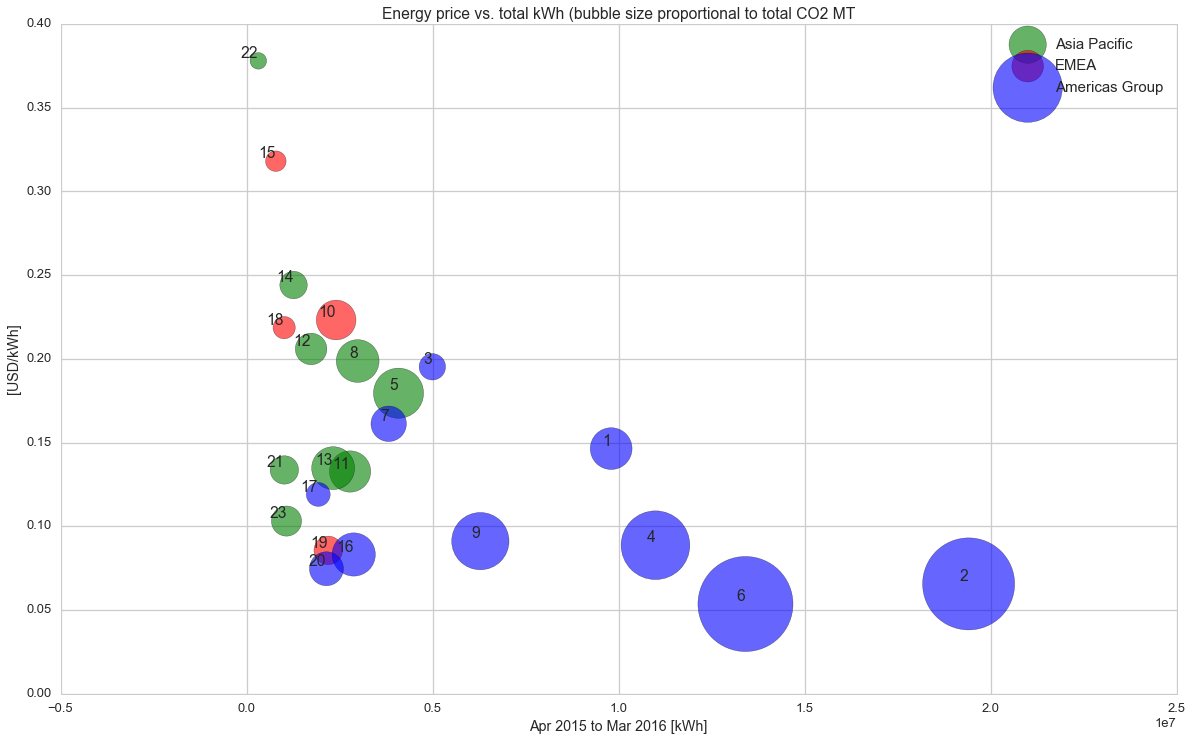

In [550]:
#All sites with total cost >150000 included (#Exclude Chennai factory. )
fig3 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax3 = plt.subplot(111)

plot_AP3 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'],Asia_Pacific['[USD/kWh]'],alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [MT]'])
plot_EMEA3 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [kWh]'],EMEA['[USD/kWh]'],alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [MT]'])
plot_AG3 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [kWh]'],Americas_Group['[USD/kWh]'],alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [MT]'])

#xmax3=15000
#ymax3=0.4
ax3.grid(True)
#Exclude Chennai factory. 
#ax3.set_xlim([0,10000])
#ax3.set_ylim([0,0.4])
ax3.set_xlabel('Apr 2015 to Mar 2016 [kWh]')
ax3.set_ylabel('[USD/kWh]')
ax3.set_title('Energy price vs. total kWh (bubble size proportional to total CO2 MT')


labels1 = Asia_Pacific['Number']
labels2 = EMEA['Number']
labels3 = Americas_Group['Number']


#add data label to the plot where elec price> 0.3 USD/kWh or total cost >200K.
for label, x, y in zip(labels1, Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'], Asia_Pacific['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels2, EMEA['Apr 2015 to Mar 2016 [kWh]'], EMEA['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels3, Americas_Group['Apr 2015 to Mar 2016 [kWh]'], Americas_Group['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x, y), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )
        
        
        

#Add legend. 
plt.legend((plot_AP3, plot_EMEA3, plot_AG3),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=1,
           fontsize=15)

fig3.savefig('EnergypriceVS_kWh.png')

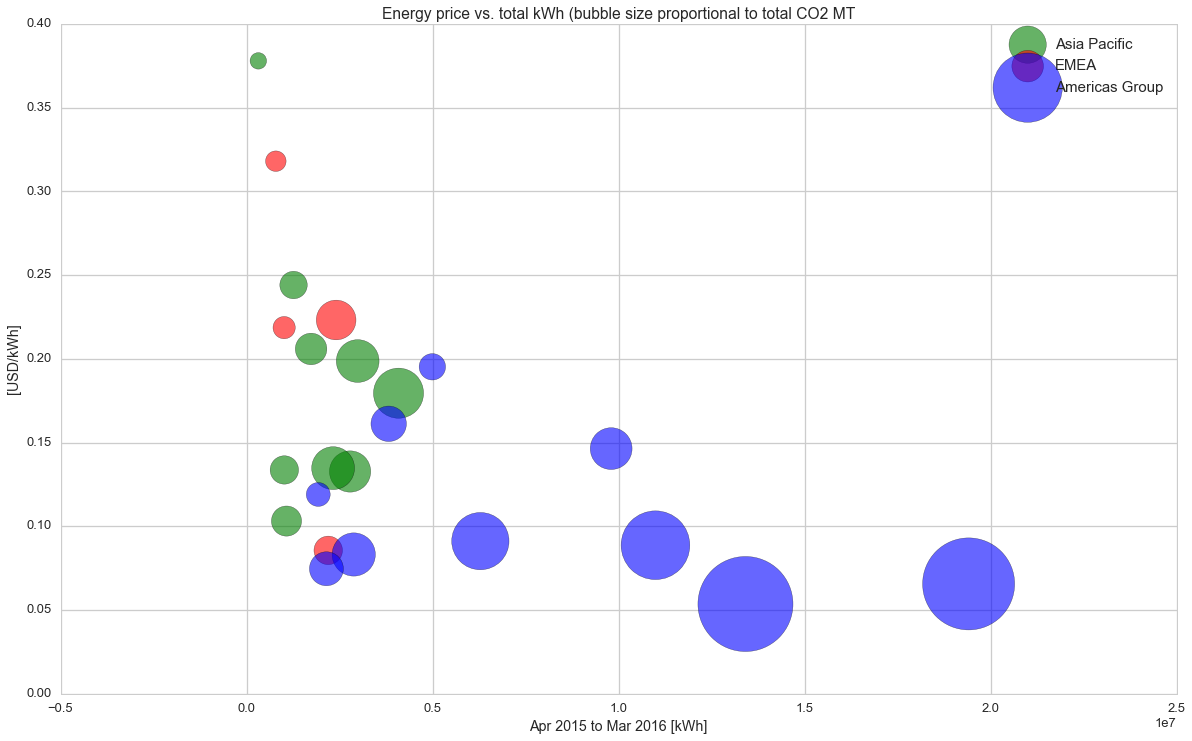

In [551]:
#All sites with total cost >150000 included (#Exclude Chennai factory. )
fig3 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax3 = plt.subplot(111)

plot_AP3 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [kWh]'],Asia_Pacific['[USD/kWh]'],alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [MT]'])
plot_EMEA3 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [kWh]'],EMEA['[USD/kWh]'],alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [MT]'])
plot_AG3 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [kWh]'],Americas_Group['[USD/kWh]'],alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [MT]'])

#xmax3=15000
#ymax3=0.4
ax3.grid(True)
#Exclude Chennai factory. 
#ax3.set_xlim([0,10000])
#ax3.set_ylim([0,0.4])
ax3.set_xlabel('Apr 2015 to Mar 2016 [kWh]')
ax3.set_ylabel('[USD/kWh]')
ax3.set_title('Energy price vs. total kWh (bubble size proportional to total CO2 MT')


labels1 = Asia_Pacific['Number']
labels2 = EMEA['Number']
labels3 = Americas_Group['Number']    
        

#Add legend. 
plt.legend((plot_AP3, plot_EMEA3, plot_AG3),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=1,
           fontsize=15)

fig3.savefig('EnergypriceVS_kWh_nonumber.png')

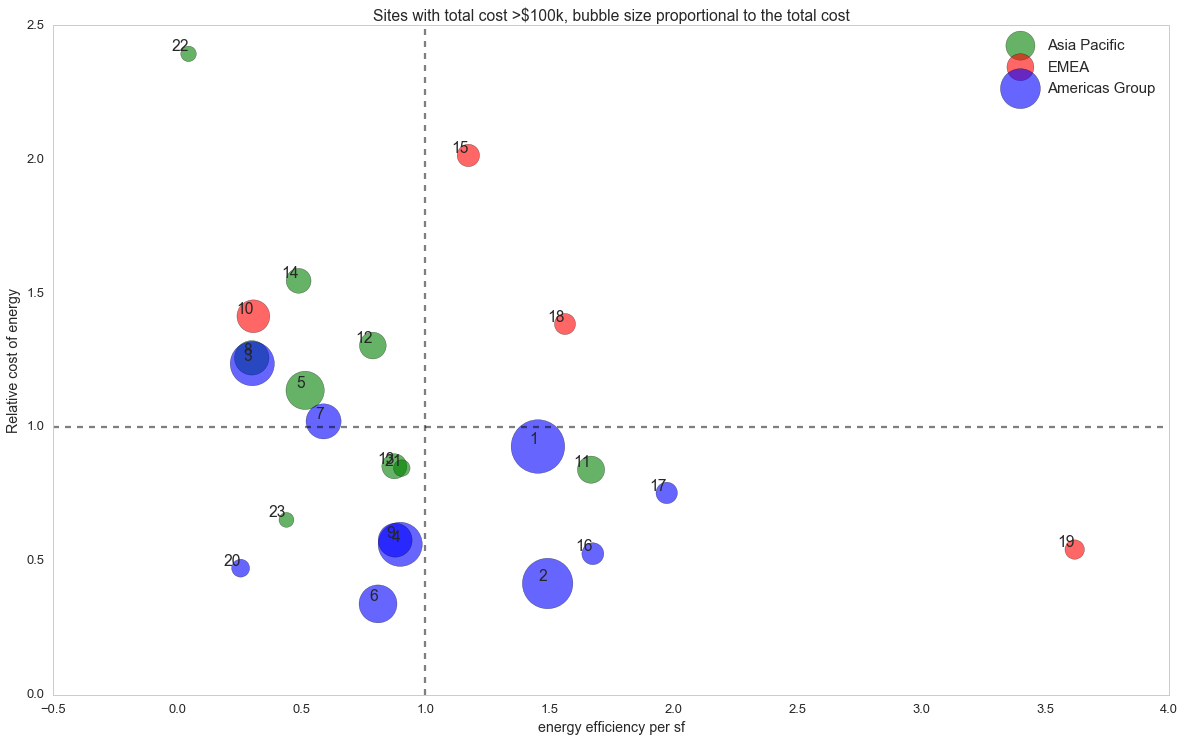

In [549]:
#All sites with total cost >150000 included (#Exclude Chennai factory. )
fig4 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax4 = plt.subplot(111)

y_ave = 0.158
x_ave = 27.3

plot_AP4 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,Asia_Pacific['[USD/kWh]']/y_ave,alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [USD]']/500)
plot_EMEA4 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,EMEA['[USD/kWh]']/y_ave,alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [USD]']/500)
plot_AG4 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,Americas_Group['[USD/kWh]']/y_ave,alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [USD]']/500)

#xmax=
#ymax=

plt.plot([-0.5,4],[1,1],color='black',alpha=0.5,linestyle='--')
plt.plot([1,1],[0,2.5],color='black',alpha=0.5,linestyle='--')



#xmax3=15000
#ymax3=0.4
ax4.grid(False)
#Exclude Chennai factory. 
ax4.set_xlim([-0.5,4])
ax4.set_ylim([0,2.5])
ax4.set_xlabel('energy efficiency per sf')
ax4.set_ylabel('Relative cost of energy')
ax4.set_title('Sites with total cost >$100k, bubble size proportional to the total cost')


labels1 = Asia_Pacific['Number']
labels2 = EMEA['Number']
labels3 = Americas_Group['Number']


for label, x, y in zip(labels1, Asia_Pacific['Apr 2015 to Mar 2016 [kWh/ft2]'], Asia_Pacific['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x/x_ave, y/y_ave), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels2, EMEA['Apr 2015 to Mar 2016 [kWh/ft2]'], EMEA['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x/x_ave, y/y_ave), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )

for label, x, y in zip(labels3, Americas_Group['Apr 2015 to Mar 2016 [kWh/ft2]'], Americas_Group['[USD/kWh]']):
    #if x>2500 or y>0.3:
        plt.annotate(
            label, 
            xy = (x/x_ave, y/y_ave), xytext = (0,0),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'none', alpha = 0.5),
            #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
        )
        
        
        

#Add legend. 
plt.legend((plot_AP4, plot_EMEA4, plot_AG4),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=1,
           fontsize=15)

fig4.savefig('Normalized_EnergypriceVS_kWh_per_sf.png')

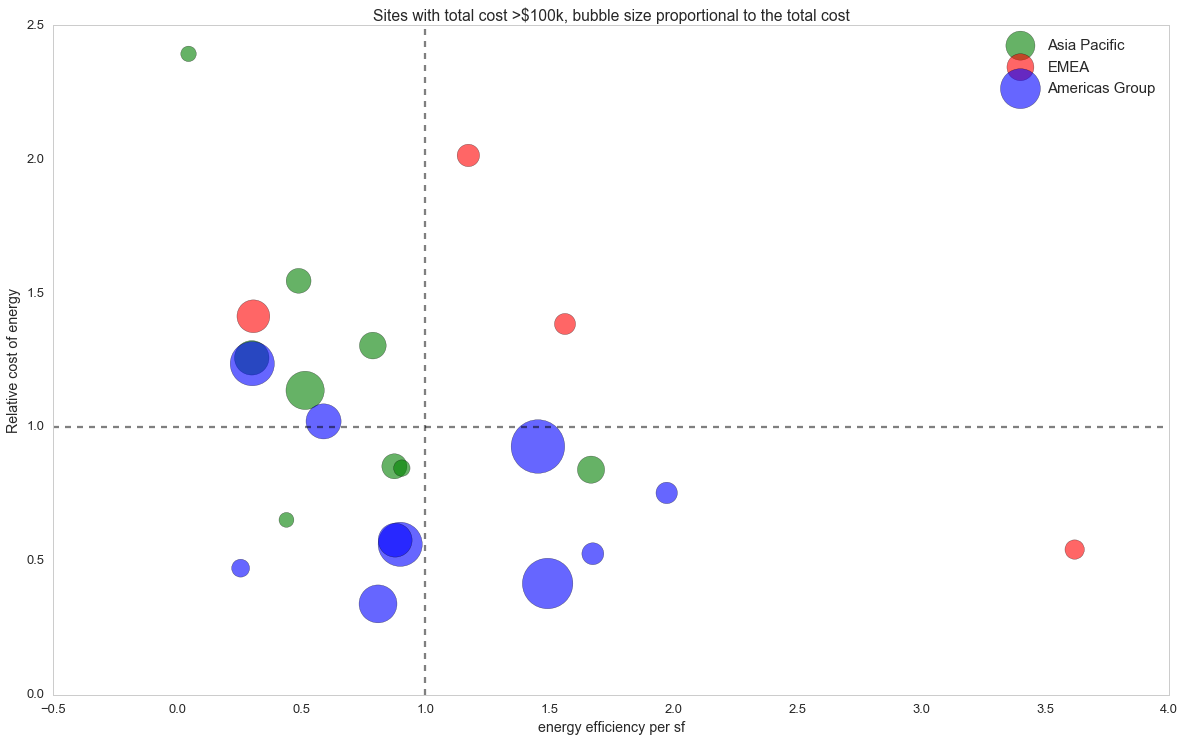

In [552]:
#All sites with total cost >150000 included (#Exclude Chennai factory. )
fig4 = plt.figure(
    figsize=(20,12), 
    dpi=300
)
ax4 = plt.subplot(111)

y_ave = 0.158
x_ave = 27.3

plot_AP4 = plt.scatter(Asia_Pacific['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,Asia_Pacific['[USD/kWh]']/y_ave,alpha=0.6,c='g',s=Asia_Pacific['Apr 2015 to Mar 2016 [USD]']/500)
plot_EMEA4 = plt.scatter(EMEA['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,EMEA['[USD/kWh]']/y_ave,alpha=0.6,c='r',s=EMEA['Apr 2015 to Mar 2016 [USD]']/500)
plot_AG4 = plt.scatter(Americas_Group['Apr 2015 to Mar 2016 [kWh/ft2]']/x_ave,Americas_Group['[USD/kWh]']/y_ave,alpha=0.6,c='b',s=Americas_Group['Apr 2015 to Mar 2016 [USD]']/500)



plt.plot([-0.5,4],[1,1],color='black',alpha=0.5,linestyle='--')
plt.plot([1,1],[0,2.5],color='black',alpha=0.5,linestyle='--')



#xmax3=15000
#ymax3=0.4
ax4.grid(False)
#Exclude Chennai factory. 
ax4.set_xlim([-0.5,4])
ax4.set_ylim([0,2.5])
ax4.set_xlabel('energy efficiency per sf')
ax4.set_ylabel('Relative cost of energy')
ax4.set_title('Sites with total cost >$100k, bubble size proportional to the total cost')


labels1 = Asia_Pacific['Number']
labels2 = EMEA['Number']
labels3 = Americas_Group['Number']



        
        
        

#Add legend. 
plt.legend((plot_AP4, plot_EMEA4, plot_AG4),
           ('Asia Pacific', 'EMEA', 'Americas Group'),
           scatterpoints=1,
           loc=1,
           fontsize=15)

fig4.savefig('Normalized_EnergypriceVS_kWh_per_sf_nonumber.png')